In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### [주의사항]   
- 각 단계에서 생성하는 파일이 잘못 될 경우 다음 문제들에서 계속 문제가 발생함
- 중간에 문제가 발생시 [0]번 셀부터 다시 순서대로 실행한다(Cell메뉴/Run all above)

### [문제 제출 방법]
- [0]번 셀의 코드부터 순서대로 함께 복사하여 붙여넣기하여 제출한다
- 예로 [3]번 문제를 푸는 과정이면 [0], [1], [2], [3]번까지 코드를 모두 복사하여 함께 제출한다
- [0]번 셀의 test변수를 채점시스템 제출시는 test변수를 1로 수정하여 제출하세요

# << 타이타닉 : 같은 가족 구성원 찾기 프로젝트 >>
## 같은 가족 구성원을 찾기 위한 다음 전제 조건을 기반으로 [1] ~ [7] 문제를 진행한다
- 티켓 번호(Ticket)는 가족끼리는 같은 티켓 번호일 것이다. 그래서 티켓 번호(Ticket)와 Last Name이 같다면 가족일 가능성이 클것이라는 전제 조건하에 문제를 진행한다.  
- 가족이 될 조건은 티켓 번호(Ticket)와 Last Name이 동일한 사람이 2인 이상일 경우를 같은 한 가족이 될 조건이다.
- [1] ~ [7]번 문제가 단계적으로 연결되어 있다.

## [0] titanic_train.csv 파일을 읽어온 df의 구성을 확인하라
- 채점시스템 제출시는 test변수를 1로 수정하여 제출하세요

In [45]:
# [0]

import pandas as pd 
import numpy as np

# 채점시스템 제출시는 test변수를 1로 수정하여 제출하세요 #
# 0: 파일에서 데이터 로드, 1: 채점시스템에서 로드

test = 0

if test == 1 :
    t = eval(input())
    df = pd.DataFrame(t[1:], columns = t[0]).iloc[:, [0,1,2,3,4,7]]
else :
    df = pd.read_csv('titanic_train.csv', usecols=[1,2,3,4,5,8])

df.head(6)

,Survived,Pclass,Name,Sex,Age,Ticket
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803
4,0,3,"Allen, Mr. William Henry",male,35.0,373450
5,0,3,"Moran, Mr. James",male,NaN,330877


## [문제 1] df['Name']에서 성(last name)만 추출하라
### 1-1. 'Name'컬럼에서 성(Last Name)만 추출하여 'Last' 컬럼을 첫번째로 df에 추가한다. 
- 예로 'Braund, Mr. Owen Harris'이면 'Braund'만 추출한다
- 참고로 Last Name(성) 뒤에는 콤마(,)가 있다
- 다음그림은 df의 일부이다
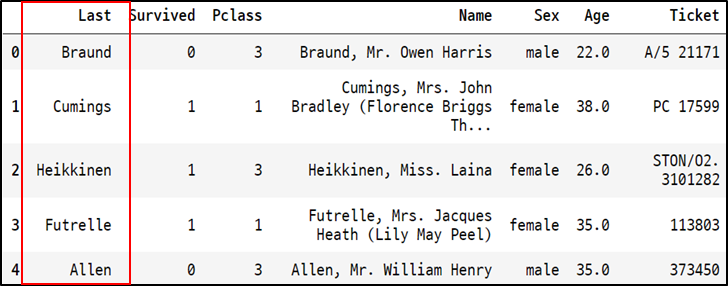

### 1-2. 'Last' 컬럼에서 10개만 추출한 Series를 r1에 대입하라.
- 다음은 r1의 인쇄 결과이며 검증용 코드에서 r1을 인쇄하여 검증한다
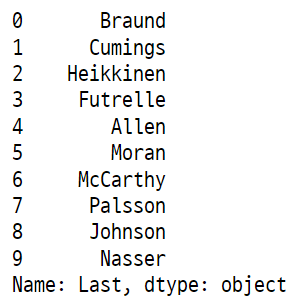

In [46]:
# [문제 1]

#--[아래에 코드 작성]--------------------------------------------------
df.insert(0,'Last',df['Name'].apply(lambda x : x.split(',')[0]))
r1 = df['Last'].head(10)

#--[검증용코드, 수정금지]--------------------------------------------------
df.head()
print(r1)

,Last,Survived,Pclass,Name,Sex,Age,Ticket
0,Braund,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171
1,Cumings,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599
2,Heikkinen,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282
3,Futrelle,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803
4,Allen,0,3,"Allen, Mr. William Henry",male,35.0,373450


0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
5        Moran
6     McCarthy
7      Palsson
8      Johnson
9       Nasser
Name: Last, dtype: object


## [문제 2] df에서 성(Last)와 티켓(Ticket)별 인원 집계하라
### 2-1. df에서 다음 조건에 따라 처리하여 sr2에 대입하라
1. 'Last'와 'Ticket'별 인원집계한다.
2. 행의 index인 'Last'와 'Ticket'순으로 오름차순 정렬되어야 한다.
- 성(Last)과 티켓이 같다면 가족일 가능성이 크다라는 조건에 부합한 자료를 추출하기 위함이다
- sr2는 다음 문제3번과 연계되어 있다. 다음은 sr2의 결과 일부이다. 

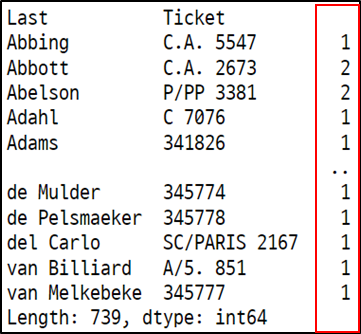

### 2-2. sr2에서 10개만 추출한 Series를 r2에 대입한다
- 다음은 r2의 인쇄 결과이며 검증용 코드에서 r2을 인쇄하여 검증한다  
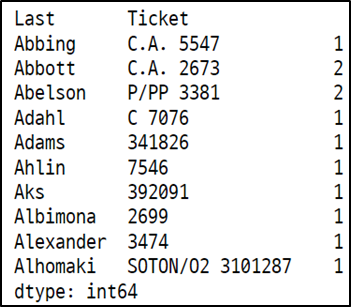

In [47]:
# [문제 2]

#--[아래에 코드 작성]--------------------------------------------------
sr2 = df.groupby(['Last','Ticket']).size()
r2 = sr2.head(10)
#--[검증용코드, 수정금지]--------------------------------------------------
sr2
print(r2)

Last           Ticket       
Abbing         C.A. 5547        1
Abbott         C.A. 2673        2
Abelson        P/PP 3381        2
Adahl          C 7076           1
Adams          341826           1
                               ..
de Mulder      345774           1
de Pelsmaeker  345778           1
del Carlo      SC/PARIS 2167    1
van Billiard   A/5. 851         1
van Melkebeke  345777           1
Length: 739, dtype: int64

Last       Ticket          
Abbing     C.A. 5547           1
Abbott     C.A. 2673           2
Abelson    P/PP 3381           2
Adahl      C 7076              1
Adams      341826              1
Ahlin      7546                1
Aks        392091              1
Albimona   2699                1
Alexander  3474                1
Alhomaki   SOTON/O2 3101287    1
dtype: int64


## [문제 3] 주어진 df3 데이터프레임 편집하기
### 3-1. sr2를 데이터프레임으로 변환하여 주어진 df3을 이용하여 다음 조건을 처리하라
1. 주어진 코드 df3=sr2.reset_index()은 'Last'와 'Ticket'을 컬럼으로 재배치한 데이터프레임이다. 
2. 인원집계한 컬럼명(0)을 'cnt'로 변경한다.
3. 완성된 df3은 행의 index는 0부터 일련번호로 구성되어 있는 739개행을 갖는 데이터프레임이다
- df3은 다음 문제4와 연계되어 있다. 다음은 df3의 결과 일부이다. 

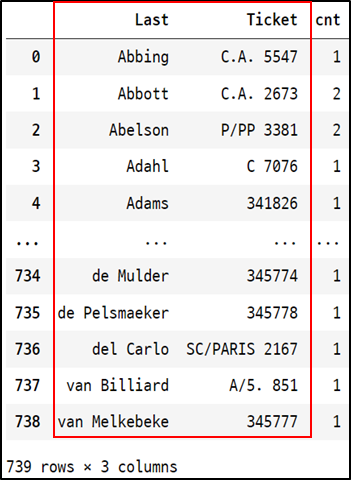
### 3-2. df3['cnt'] 컬럼에서 10개만 추출한 Series를 r3에 대입한다
- 다음은 r3의 인쇄 결과이며 검증용 코드에서 r3을 인쇄하여 검증한다
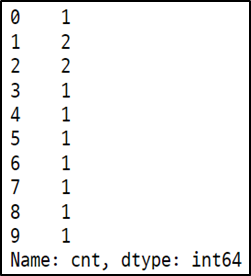

In [48]:
# [문제 3]

#--[아래에 코드 작성]--------------------------------------------------
df3 = sr2.reset_index()
df3 = df3.rename({0:'cnt'},axis=1)
r3 = df3['cnt'].head(10)

#--[검증용코드, 수정금지]--------------------------------------------------
df3
print(r3)

,Last,Ticket,cnt
0,Abbing,C.A. 5547,1
1,Abbott,C.A. 2673,2
2,Abelson,P/PP 3381,2
3,Adahl,C 7076,1
4,Adams,341826,1
...,...,...,...
734,de Mulder,345774,1
735,de Pelsmaeker,345778,1
736,del Carlo,SC/PARIS 2167,1
737,van Billiard,A/5. 851,1


0    1
1    2
2    2
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: cnt, dtype: int64


## [문제 4] df3에서 2인 이상만 데이터 추출하기
### 4-1. df3에서 2인 이상만이 가족단위이므로 2인 이상만 추출하여 df4에 대입하라
- 가족이란 Last와 Ticket이 같은 2명 이상의 집단을 의미한다.
- 즉 cnt컬럼의 값이 2 이상인 행을 추출한다.
- df4는 행의 index는 0부터 일련번호로 구성된 99개행을 갖는 데이터프레임이다
- df4은 다음 문제5와 연계되어 있다. 다음은 df4의 결과 일부이다. 

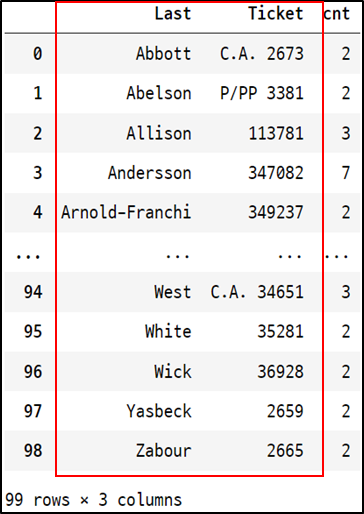

### 4-2. df4['cnt'] 컬럼에서 10개만 추출한 Series를 r4에 대입한다
- 다음은 r4의 인쇄 결과이며 검증용 코드에서 r4을 인쇄하여 검증한다
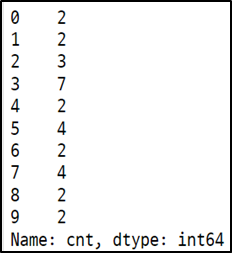

In [49]:
# [문제 4]

#--[아래에 코드 작성]--------------------------------------------------
df4 = df3[df3['cnt']>=2].reset_index(drop=True)
r4 = df4['cnt'].head(10)
#--[검증용코드, 수정금지]--------------------------------------------------
df4
print(r4)

,Last,Ticket,cnt
0,Abbott,C.A. 2673,2
1,Abelson,P/PP 3381,2
2,Allison,113781,3
3,Andersson,347082,7
4,Arnold-Franchi,349237,2
...,...,...,...
94,West,C.A. 34651,3
95,White,35281,2
96,Wick,36928,2
97,Yasbeck,2659,2


0    2
1    2
2    3
3    7
4    2
5    4
6    2
7    4
8    2
9    2
Name: cnt, dtype: int64


## [문제 5] df4에서 같은 가족 구성원들의 추가 정보를 df에서 가져오기
### 5-1. df4에서 Last와 Ticket과 일치하는 가족들의 추가 정보를 df에서 가져와 df5에 대입한다
- df에서 가져와 연결한 df5는 총 251개행으로 구성된 데이터프레임이다
- df5는 다음 문제6번과 연계되어 있다. 다음 df5의 인쇄 결과를 참고하라(일부임)

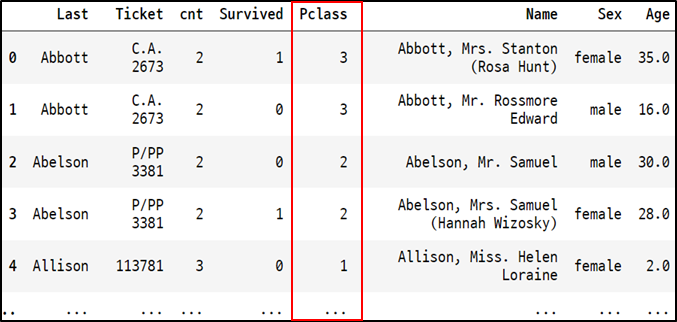

### 5-2. df5['Pclass']컬럼에서 10개만 추출한 Series를 r5에 대입하라
- r5의 인쇄된 결과는 다음과 같다
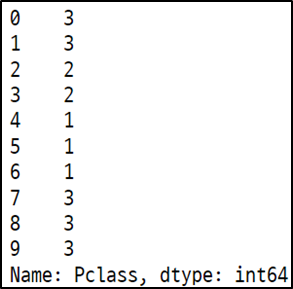

In [50]:
# [5번 문제] 

#--[아래에 코드 작성]--------------------------------------------------
df5 = df4.merge(df, how='left')
r5 = df5['Pclass'].head(10)
#--[검증용코드, 수정금지]--------------------------------------------------
df5
print(r5)

,Last,Ticket,cnt,Survived,Pclass,Name,Sex,Age
0,Abbott,C.A. 2673,2,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0
1,Abbott,C.A. 2673,2,0,3,"Abbott, Mr. Rossmore Edward",male,16.0
2,Abelson,P/PP 3381,2,0,2,"Abelson, Mr. Samuel",male,30.0
3,Abelson,P/PP 3381,2,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0
4,Allison,113781,3,0,1,"Allison, Miss. Helen Loraine",female,2.0
...,...,...,...,...,...,...,...,...
246,Wick,36928,2,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0
247,Yasbeck,2659,2,0,3,"Yasbeck, Mr. Antoni",male,27.0
248,Yasbeck,2659,2,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0
249,Zabour,2665,2,0,3,"Zabour, Miss. Hileni",female,14.5


0    3
1    3
2    2
3    2
4    1
5    1
6    1
7    3
8    3
9    3
Name: Pclass, dtype: int64


## [문제 6] df5에서 cnt(가족인원수)별 총인원수와 생존자수로 집계하여  r6에 대입하라
- 총인원수로 집계할 컬럼명은 'sum'으로, 생존자수로 집계할 컬럼명은 'alive'로 지정한다.
- 아래 그림의 첫 번째 행에서 cnt 항목의 2는 가족의 인원수가 2명임을 의미하고, 144는 인원수가 2인 가족의 총인원수가 144명(가족수 2인 가족이 72팀)임을 의미하고, 86은 144명 중 생존자수가 86명임을 의미한다.
- r6의 결과로 다음 그림을 참고하라
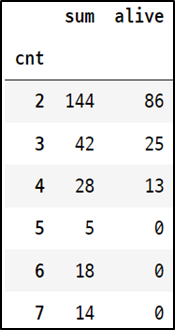

In [51]:
# [6번 문제] 

#--[아래에 코드 작성]--------------------------------------------------
r6 = df5.groupby('cnt').agg(sum = ('Name','size'), alive=('Survived','sum'))
#--[검증용코드, 수정금지]--------------------------------------------------
r6
print(r6)

,sum,alive
cnt,,
2,144,86
3,42,25
4,28,13
5,5,0
6,18,0
7,14,0


     sum  alive
cnt            
2    144     86
3     42     25
4     28     13
5      5      0
6     18      0
7     14      0


## [문제 7] 문제 4번에서 완성한 df4를 이용하여 다음 조건에 만족하는 가족 구성원을 모두 추출하라
### [조건 이해] 
- 티켓 번호(Ticket)와 성(Last)이 같다면 가족일 가능성이 높다. 하지만 성은 같은데 티켓번호가 다른 가족이 있을수 있다. 이러한 가족 구성원을 찾아보자
- 예로 아래와 같은 가족들은 모두 성과 티켓이 모두 다르다.
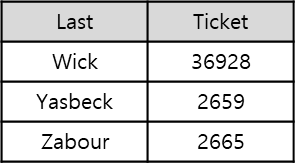
- 그런데 다음 아래와 같은 가족들은 성은 같은데 티켓이 모두 다른 가족들이다. 이러한 가족들을 모두 추출하려 한다. 
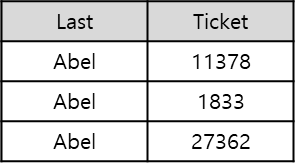


### 7-1. df4에서 성(Last)은 같지만 티켓이 다른 가족이 존재한다. 이러한 가족들을 모두 추출하여 df7변수에 대입하라
- df7의 결과로 성은 같지만 티켓이 다른 가족 6팀이 추출된다. 다음 그림은 df7의 결과이다
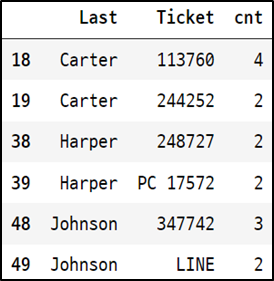

### 7-2. df7의 Last와 Ticket이 동일한 가족 구성원들의 추가 정보를 df에서 가져와 df8에 대입한다
- df8의 결과 일부인 아래 그림을 예로 설명하면 df7의 'Carter'가족 2팀의 구성원 총 6명의 정보를 df에서 가져와 연결한 결과이다. 
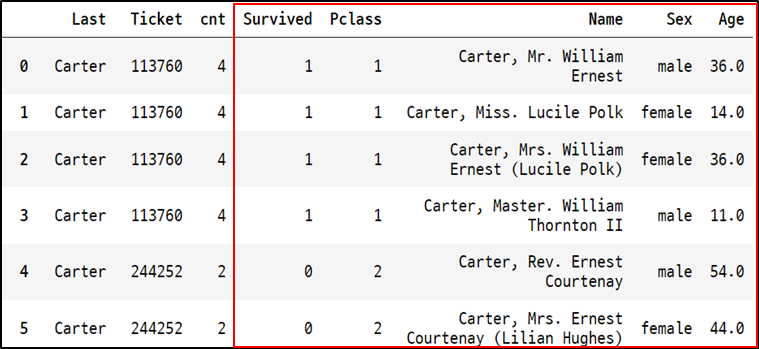

### 7-3. df8에서 가족 구성원 전원 사망한 집단의 이름만(Name) 추출한 Series를 r7에 대입한다
- Last와 Ticket별 가족 구성원내 전원 사망한 명단('Name')을 추출하고 index를 초기화한 후 r7에 대입한다.
- df8에서 가족 구성원이 모두 사망한 집단은 'Carter'가족의 '244252'티켓과 'Johnson'가족의	'LINE'티켓 2집단의 가족 구성원 전원 사망하였다. 해당 구성원들의 이름('Name')을 추출한다.
- 단. 사망한 집단을 찾아서 해당 가족 구성원들을 추출하는 코드를 구현해야 한다.
- 다음은 r7의 결과이다
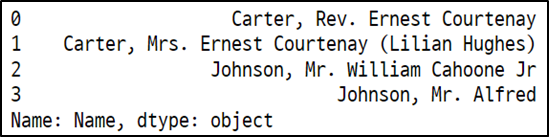

In [65]:
# [7번 문제] 

#--[아래에 코드 작성]--------------------------------------------------
# df4.head()
m = df4['Last'].duplicated(keep=False)
df7 = df4[m]

df8 = df7.merge(df, how='left')

# def f1(x):
#     return x['Survived'].sum() == 0
# r7 = df8.groupby(['Last','Ticket']).filter(f1).reset_index()['Name']
r7 = df8.groupby(['Last','Ticket']).filter(lambda x : x['Survived'].sum()==0).reset_index()['Name']

#--[검증용코드, 수정금지]--------------------------------------------------
df7
df8
print(r7)

,Last,Ticket,cnt
18,Carter,113760,4
19,Carter,244252,2
38,Harper,248727,2
39,Harper,PC 17572,2
48,Johnson,347742,3
49,Johnson,LINE,2


,Last,Ticket,cnt,Survived,Pclass,Name,Sex,Age
0,Carter,113760,4,1,1,"Carter, Mr. William Ernest",male,36.0
1,Carter,113760,4,1,1,"Carter, Miss. Lucile Polk",female,14.0
2,Carter,113760,4,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0
3,Carter,113760,4,1,1,"Carter, Master. William Thornton II",male,11.0
4,Carter,244252,2,0,2,"Carter, Rev. Ernest Courtenay",male,54.0
5,Carter,244252,2,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0
6,Harper,248727,2,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0
7,Harper,248727,2,0,2,"Harper, Rev. John",male,28.0
8,Harper,PC 17572,2,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0
9,Harper,PC 17572,2,1,1,"Harper, Mr. Henry Sleeper",male,48.0


0                    Carter, Rev. Ernest Courtenay
1    Carter, Mrs. Ernest Courtenay (Lilian Hughes)
2                  Johnson, Mr. William Cahoone Jr
3                              Johnson, Mr. Alfred
Name: Name, dtype: object
